**Chocolate Sales EDA**

## imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Chocolate Sales.csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


# Exploratory Data Analysis

## Data Exploration

In [3]:
df.shape

(1094, 6)

In [4]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Sales by Country

### Number of Sales

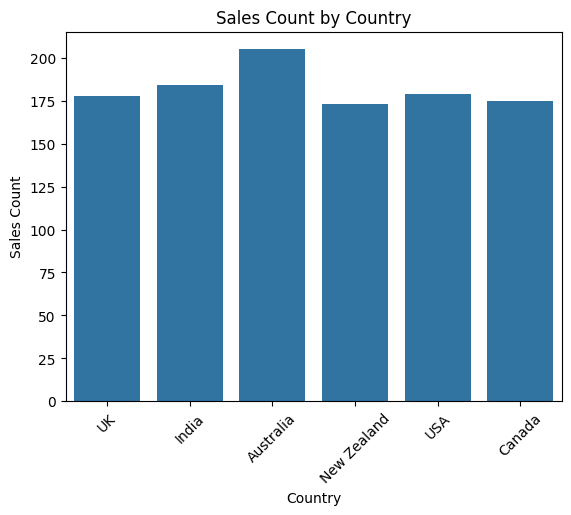

In [6]:
sns.countplot(x='Country', data=df)
plt.title('Sales Count by Country')
plt.xlabel('Country')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.show()

### Sales in USD

In [7]:
df["Amount"] = df["Amount"].replace('[\$,]', '', regex=True).astype(float) 
country_sales = df.groupby("Country")["Amount"].sum().sort_values(ascending=False)
country_sales

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Kath\AppData\Local\Temp\ipykernel_27984\3964990200.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["Amount"] = df["Amount"].replace('[\$,]', '', regex=True).astype(float)


Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64

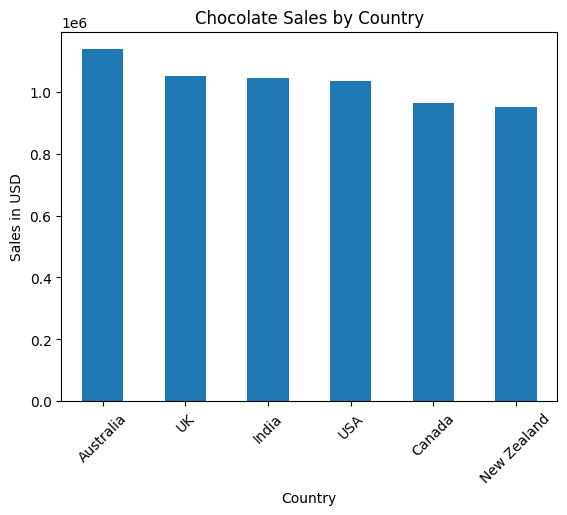

In [8]:
country_sales.plot(kind = "bar")
plt.title("Chocolate Sales by Country")
plt.xlabel("Country")
plt.ylabel("Sales in USD")
plt.xticks(rotation=45)
plt.show()

### Sales in Boxes

In [9]:
country_boxes = df.groupby("Country")["Boxes Shipped"].sum().sort_values(ascending=False)
print(country_boxes)

Country
Australia      32647
Canada         31221
UK             30265
India          29470
USA            26824
New Zealand    26580
Name: Boxes Shipped, dtype: int64


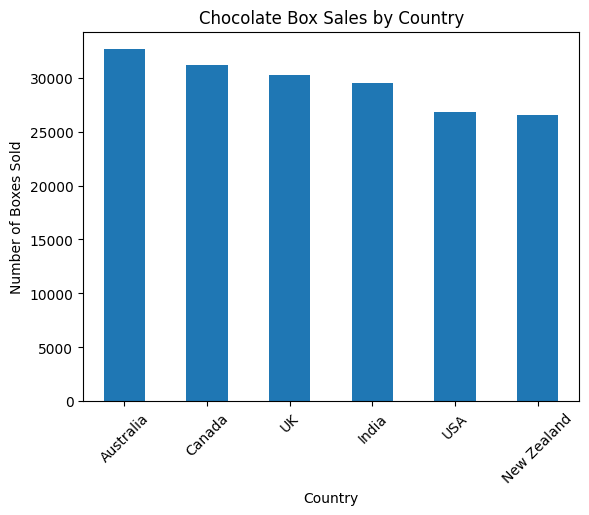

In [10]:
country_boxes.plot(kind = "bar")
plt.title("Chocolate Box Sales by Country")
plt.xlabel("Country")
plt.ylabel("Number of Boxes Sold")
plt.xticks(rotation=45)
plt.show()

## Distribution of Sales and Boxes

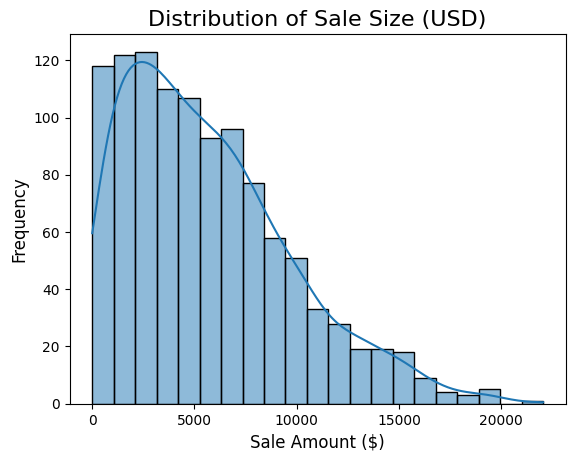

In [11]:
sns.histplot(df['Amount'], kde=True)
plt.title("Distribution of Sale Size (USD)", fontsize=16)
plt.xlabel("Sale Amount ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

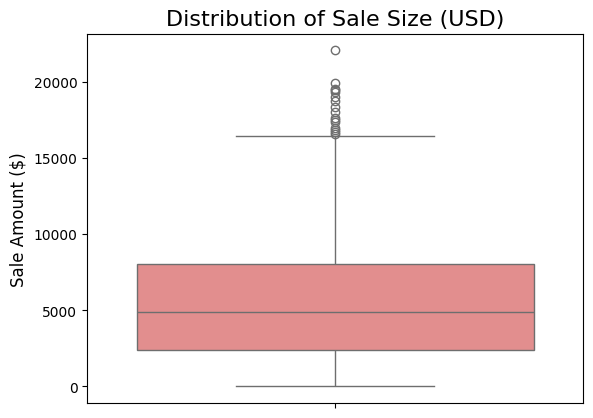

In [12]:
sns.boxplot(y=df['Amount'], color='lightcoral')
plt.title("Distribution of Sale Size (USD)", fontsize=16)
plt.ylabel("Sale Amount ($)", fontsize=12)
plt.show()

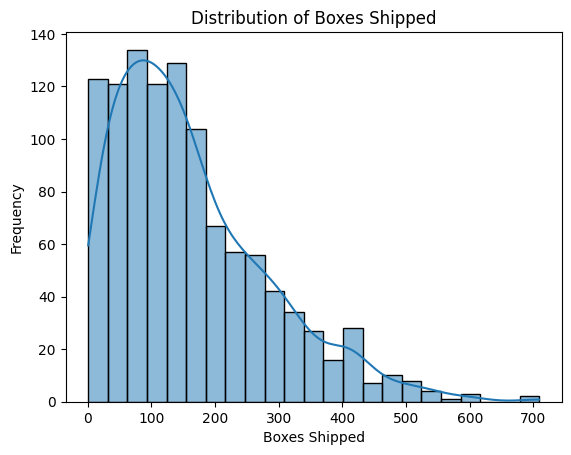

In [13]:
sns.histplot(df['Boxes Shipped'], kde=True)
plt.title('Distribution of Boxes Shipped')
plt.xlabel('Boxes Shipped')
plt.ylabel('Frequency')
plt.show()

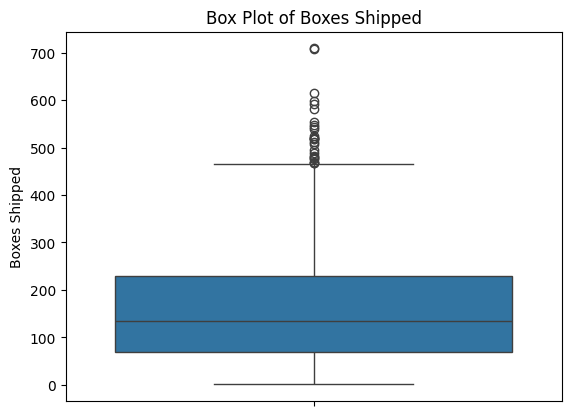

In [14]:
sns.boxplot(y=df['Boxes Shipped'])
plt.title('Box Plot of Boxes Shipped')
plt.ylabel('Boxes Shipped')
plt.show()

## Product Analysis

In [15]:
df.groupby('Product').agg({'Amount' : 'sum', 'Boxes Shipped' : 'sum'}).sort_values(by = 'Amount', ascending = False)

,Amount,Boxes Shipped
Product,,
Smooth Sliky Salty,349692.0,8810
50% Dark Bites,341712.0,9792
White Choc,329147.0,8240
Peanut Butter Cubes,324842.0,8304
Eclairs,312445.0,8757
99% Dark & Pure,299796.0,8127
85% Dark Bars,299229.0,7793
Organic Choco Syrup,294700.0,7749
Spicy Special Slims,293454.0,8685


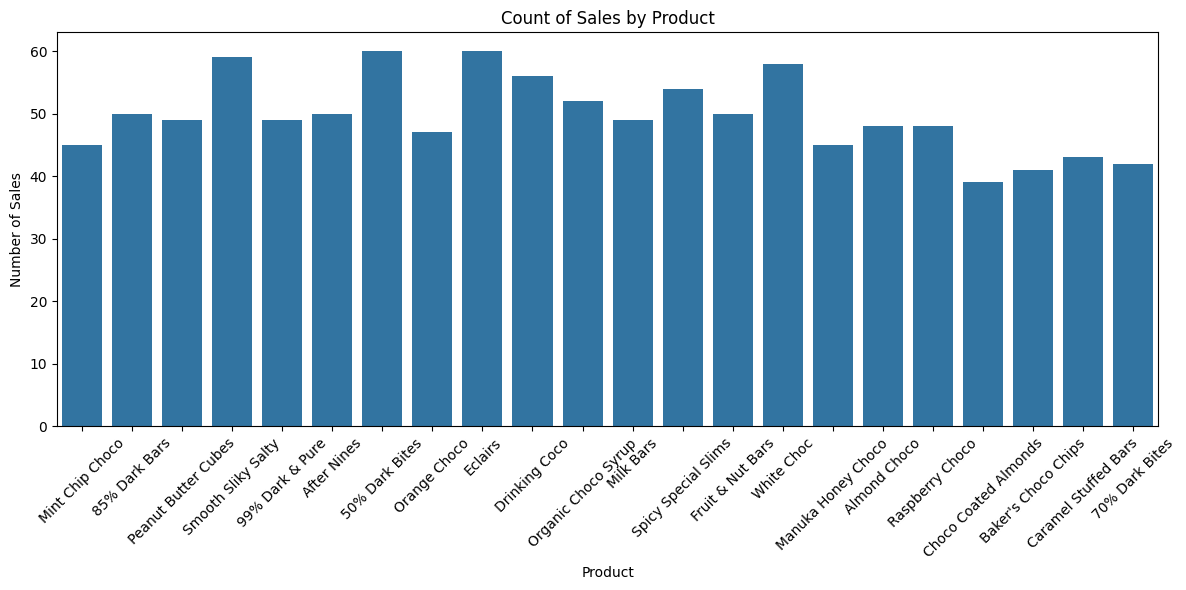

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product', data=df)
plt.title('Count of Sales by Product')
plt.xlabel('Product')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Trends by Country

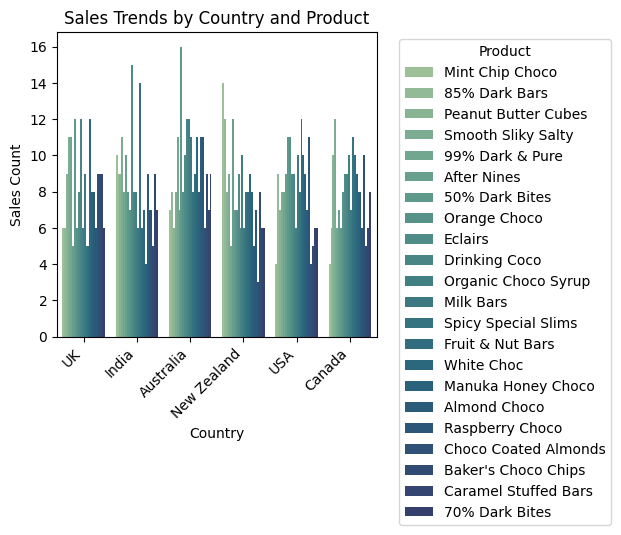

In [17]:
sns.countplot(x='Country', hue='Product', data=df, palette='crest')
plt.title('Sales Trends by Country and Product')
plt.xlabel('Country')
plt.ylabel('Sales Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Salesperson Analytics

### Sales per Salesperson

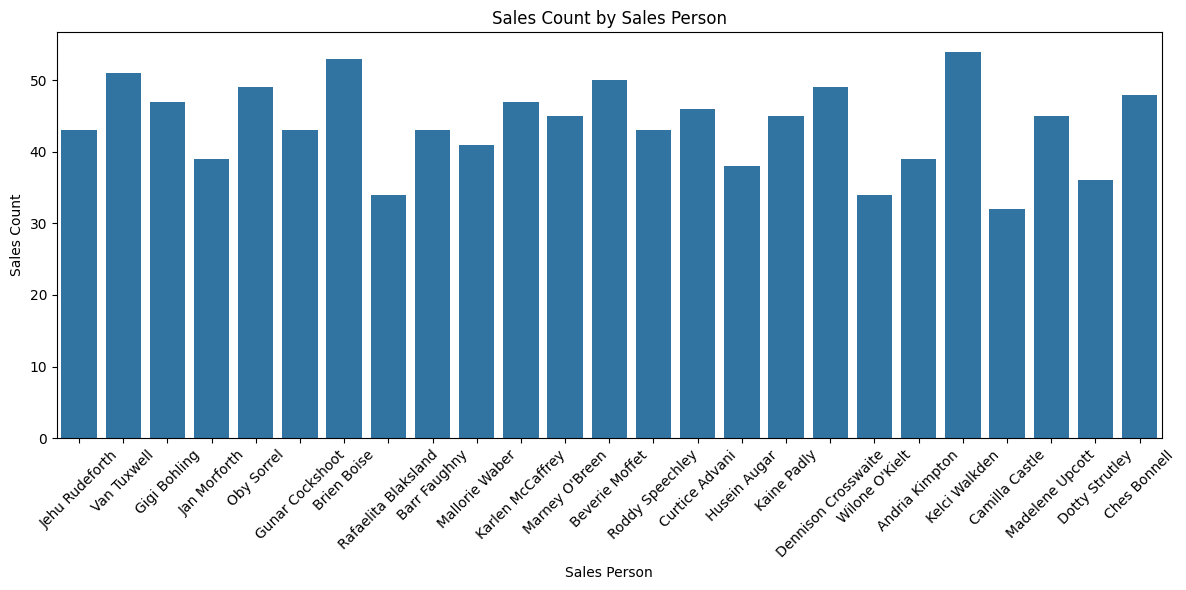

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sales Person', data=df)
plt.title('Sales Count by Sales Person')
plt.xlabel('Sales Person')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()